##Import the necessary libraries

In [1]:
#for data loading
import pandas as pd

#for text pre-processing
import nltk
import re
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')

#for visualisation
import matplotlib.pyplot as plt
import seaborn as sn

#for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

#for k-means clustering
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AffinityPropagation

#for hierarchy clustering
from scipy.cluster.hierarchy import ward, dendrogram

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Load Dataset

In [2]:
df=pd.read_csv("/content/tmdb_5000_movies.csv")
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


##Statistical Analysis

In [3]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

<ipython-input-5-57aaa7d048c5>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), cmap='coolwarm',annot=True)


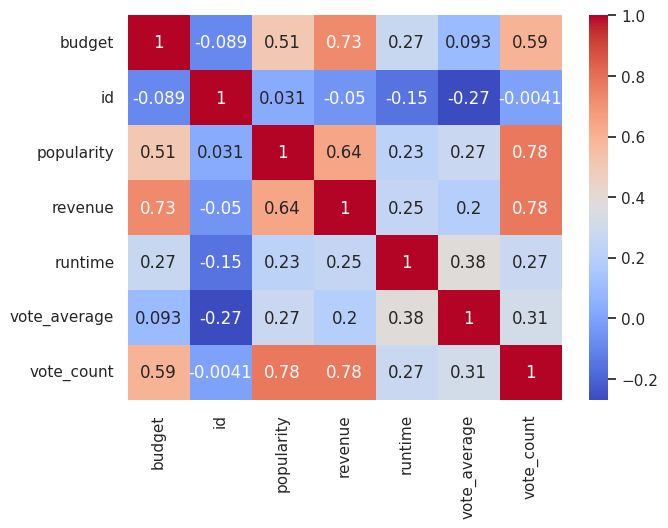

In [5]:
#correlation

sn.set(rc={'figure.figsize':(7,5)})
sn.heatmap(df.corr(), cmap='coolwarm',annot=True)

# displaying heatmap

plt.show()

##Preprocessing

Remove unwanted columns and deal with missing values

In [6]:
#Select sub columns
df = df[['title', 'tagline', 'overview', 'genres', 'popularity']]

#fill missing (NaN) values in the 'tagline' column with an empty string ('')
df.tagline.fillna('', inplace=True)

'''creates a new column 'description' in the DataFrame df.
 The values in this column are obtained by
 concatenating the 'tagline' and 'overview' columns. '''
df['description'] = df['tagline'].map(str) + ' ' + df['overview']

#remove rows with missing values
df.dropna(inplace=True)


df.isnull().sum()

<ipython-input-6-912fe4d516b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.tagline.fillna('', inplace=True)
<ipython-input-6-912fe4d516b4>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['description'] = df['tagline'].map(str) + ' ' + df['overview']
<ipython-input-6-912fe4d516b4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


title          0
tagline        0
overview       0
genres         0
popularity     0
description    0
dtype: int64

In [7]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


##Text Preprocessing

In [8]:
#import stopwords from NLTK
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()

    # tokenize document
    tokens = nltk.word_tokenize(doc)

    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)

    return doc

#create a vectorized version of the normalize_document function
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(df['description']))
len(norm_corpus)

4800

In [9]:
df.head()

,title,tagline,overview,genres,popularity,description
0,Avatar,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,Enter the World of Pandora. In the 22nd centur...
1,Pirates of the Caribbean: At World's End,"At the end of the world, the adventure begins.","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,"At the end of the world, the adventure begins...."
2,Spectre,A Plan No One Escapes,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,A Plan No One Escapes A cryptic message from B...
3,The Dark Knight Rises,The Legend Ends,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,The Legend Ends Following the death of Distric...
4,John Carter,"Lost in our world, found in another.","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,"Lost in our world, found in another. John Cart..."


In [10]:
#add three custom stop words ('one', 'two', 'get') to the existing stop words list
stop_words = stop_words + ['one', 'two', 'get']

#create a countvectorizer
cv = CountVectorizer(ngram_range=(1, 2), min_df=10, max_df=0.8, stop_words=stop_words)

#convert the normalized corpus into a sparse matrix
cv_matrix = cv.fit_transform(norm_corpus)

#shape of the matrix
cv_matrix.shape

(4800, 3012)

##Visualisation

In [11]:
top_10_pop=df.nlargest(10, 'popularity')

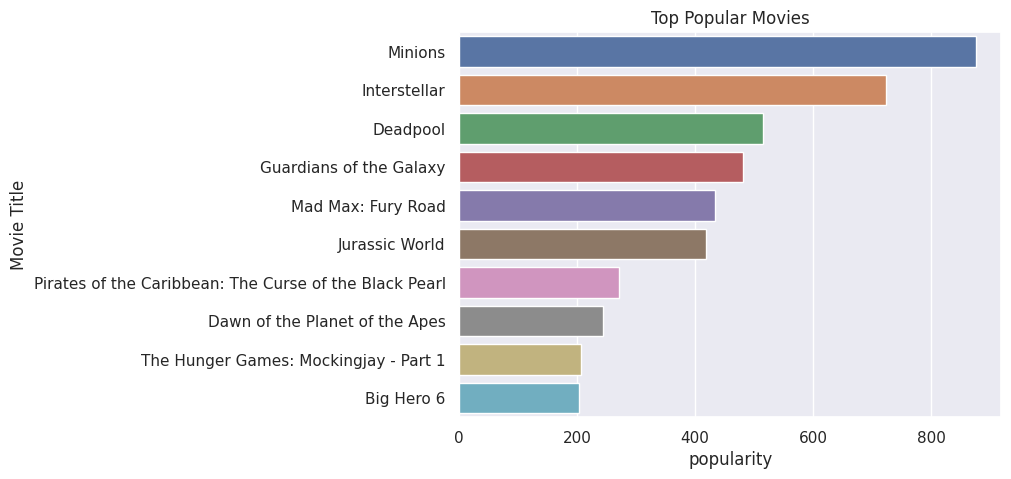

In [12]:
#top 10 movies
sn.barplot(x=top_10_pop["popularity"], y=top_10_pop["title"], orient='h')
plt.xlabel("popularity")
plt.ylabel("Movie Title")
plt.title("Top Popular Movies")
plt.show()
#df.plot.bar( top_10_pop["title"],)

##Clustering

###K-means Algorithm

In [13]:
#Group the documents into six clusters
Num_Clusters = 6

#Create and fit the model
km = KMeans(n_clusters=Num_Clusters, max_iter=10000, n_init=50, random_state=42).fit(cv_matrix)
km

KMeans(max_iter=10000, n_clusters=6, n_init=50, random_state=42)

In [14]:
#Count the occurrences of each unique label
Counter(km.labels_)

Counter({2: 429, 1: 2832, 3: 539, 5: 238, 4: 706, 0: 56})

In [15]:
df['kmeans_cluster'] = km.labels_

In [16]:
#selecting relevant columns ('title', 'kmeans_cluster', 'popularity')
#sorting by cluster and popularity
#taking the top 20 movies from each cluster

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))


movie_clusters = movie_clusters.copy(deep=True)

In [17]:
#list of feature names
feature_names = cv.get_feature_names_out()

#top 15 features to display for each cluster
topn_features = 15

#indices that would sort the cluster centroids in descending order.
ordered_centroids = km.cluster_centers_.argsort()[:, ::-1]

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(Num_Clusters):
    key_features = [feature_names[index]
                        for index in ordered_centroids[cluster_num, :topn_features]]
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER '+str(cluster_num+1))
    print('Key Features:', key_features)
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER 1
Key Features: ['film', 'movie', 'story', 'first', 'love', 'making', 'director', 'new', 'time', 'feature', 'made', 'young', '3d', 'american', 'america']
Popular Movies: ['Contact', 'Snatch', 'The Pianist', 'Boyhood', 'Tropic Thunder', 'Movie 43', 'Night of the Living Dead', 'Almost Famous', 'My Week with Marilyn', 'Jackass 3D', 'Inside Job', 'Grindhouse', 'The Young Victoria', 'Disaster Movie', 'Jersey Boys', 'Seed of Chucky', 'Bowling for Columbine', 'Walking With Dinosaurs', 'Me and You and Everyone We Know', 'Urban Legends: Final Cut']
--------------------------------------------------------------------------------
CLUSTER 2
Key Features: ['young', 'man', 'story', 'love', 'family', 'find', 'must', 'time', 'back', 'friends', 'way', 'years', 'help', 'father', 'take']
Popular Movies: ['Interstellar', 'Guardians of the Galaxy', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'Whip

In [18]:
 #calculate similarities between documents based on their feature vectors

cosine_sim_features = cosine_similarity(cv_matrix)
km = KMeans(n_clusters=Num_Clusters, max_iter=10000, n_init=50, random_state=42).fit(cosine_sim_features)
Counter(km.labels_)

df['kmeans_cluster'] = km.labels_

movie_clusters = (df[['title', 'kmeans_cluster', 'popularity']]
                  .sort_values(by=['kmeans_cluster', 'popularity'],
                               ascending=False)
                  .groupby('kmeans_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get movies belonging to each cluster
for cluster_num in range(Num_Clusters):
    movies = movie_clusters[movie_clusters['kmeans_cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER '+str(cluster_num+1))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER 1
Popular Movies: ['Pirates of the Caribbean: The Curse of the Black Pearl', 'Whiplash', 'The Martian', 'Frozen', 'Gone Girl', 'The Lord of the Rings: The Fellowship of the Ring', 'Pirates of the Caribbean: On Stranger Tides', 'Pulp Fiction', 'The Fifth Element', 'Quantum of Solace', 'Furious 7', 'Cinderella', 'Man of Steel', 'Gladiator', 'Aladdin', 'The Amazing Spider-Man', 'Prisoners', 'The Good, the Bad and the Ugly', 'American Sniper', 'Finding Nemo']
--------------------------------------------------------------------------------
CLUSTER 2
Popular Movies: ['Interstellar', 'Guardians of the Galaxy', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'X-Men: Apocalypse', 'Rise of the Planet of the Apes', "One Flew Over the Cuckoo's Nest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle o

###Affinity Propogation

In [19]:
#Create affinity propagation model and fit with cosine similarity matrix
ap = AffinityPropagation(max_iter=1000)
ap.fit(cosine_sim_features)

res = Counter(ap.labels_)

#Print the Most Common Clusters and their Counts
res.most_common(10)

[(183, 1355),
 (182, 93),
 (159, 80),
 (54, 74),
 (81, 57),
 (16, 51),
 (26, 47),
 (24, 45),
 (48, 43),
 (89, 42)]

In [20]:
df['affprop_cluster'] = ap.labels_
filtered_clusters = [item[0] for item in res.most_common(8)]
filtered_df = df[df['affprop_cluster'].isin(filtered_clusters)]

#selecting relevant columns ('title','affprop_cluster' , 'popularity')
#sorting by cluster and popularity
#taking the top 20 movies from each cluster
movie_clusters = (filtered_df[['title', 'affprop_cluster', 'popularity']]
                  .sort_values(by=['affprop_cluster', 'popularity'],
                               ascending=False)
                  .groupby('affprop_cluster').head(20))
movie_clusters = movie_clusters.copy(deep=True)

# get key features for each cluster
# get movies belonging to each cluster
for cluster_num in range(len(filtered_clusters)):
    movies = movie_clusters[movie_clusters['affprop_cluster'] == filtered_clusters[cluster_num]]['title'].values.tolist()
    print('CLUSTER '+str(filtered_clusters[cluster_num]))
    print('Popular Movies:', movies)
    print('-'*80)

CLUSTER 183
Popular Movies: ['Interstellar', 'Dawn of the Planet of the Apes', 'Big Hero 6', 'The Dark Knight', "Pirates of the Caribbean: Dead Man's Chest", 'The Hunger Games: Mockingjay - Part 2', 'Star Wars', 'Brave', 'The Lord of the Rings: The Return of the King', 'The Hobbit: The Battle of the Five Armies', 'Iron Man', 'Transformers: Age of Extinction', 'Lucy', 'Mission: Impossible - Rogue Nation', 'Maze Runner: The Scorch Trials', 'Spectre', 'The Green Mile', 'Terminator 2: Judgment Day', 'Exodus: Gods and Kings', 'Harry Potter and the Goblet of Fire']
--------------------------------------------------------------------------------
CLUSTER 182
Popular Movies: ['Inception', 'Harry Potter and the Chamber of Secrets', 'The Hobbit: An Unexpected Journey', 'Django Unchained', 'American Beauty', 'Snowpiercer', 'Trainspotting', 'First Blood', 'The Bourne Supremacy', 'Yes Man', 'The Secret Life of Walter Mitty', 'RED', 'Casino', 'The Passion of the Christ', 'Annie', 'Fantasia', 'Vicky C

###Hierarchical clustering using Ward algorithm

In [21]:
def ward_hierarchical_clustering(feature_matrix):
    #Calculate cosine distance
    cosine_distance = 1 - cosine_similarity(feature_matrix)

    #apply hierarchical clustering using ward
    linkage_matrix = ward(cosine_distance)

    return linkage_matrix

In [22]:
#function to plot a dendogram to visualize the cluster

def plot_hierarchical_clusters(linkage_matrix, movie_data, p=100, figure_size=(8,12)):
    # set size
    fig, ax = plt.subplots(figsize=figure_size)

    movie_titles = movie_data['title'].values.tolist()

    # plot dendrogram
    R = dendrogram(linkage_matrix, orientation="left", labels=movie_titles,
                    truncate_mode='lastp',
                    p=p,
                    no_plot=True)
    # map the leaves of the dendrogram to their corresponding movie titles.
    temp = {R["leaves"][ii]: movie_titles[ii] for ii in range(len(R["leaves"]))}

    #label the leaves in the dendrogram with the corresponding movie titles.
    def llf(xx):
        return "{}".format(temp[xx])

    #plot the graph
    ax = dendrogram(
            linkage_matrix,
            truncate_mode='lastp',
            orientation="left",
            p=p,
            leaf_label_func=llf,
            leaf_font_size=10.,
            )
    #hide x-axis ticks
    plt.tick_params(axis= 'x',
                    which='both',
                    bottom='off',
                    top='off',
                    labelbottom='off')

    #Adjust the layout
    plt.tight_layout()
    plt.savefig('movie_hierachical_clusters.png', dpi=200)

In [23]:
linkage_matrix = ward_hierarchical_clustering(cv_matrix)

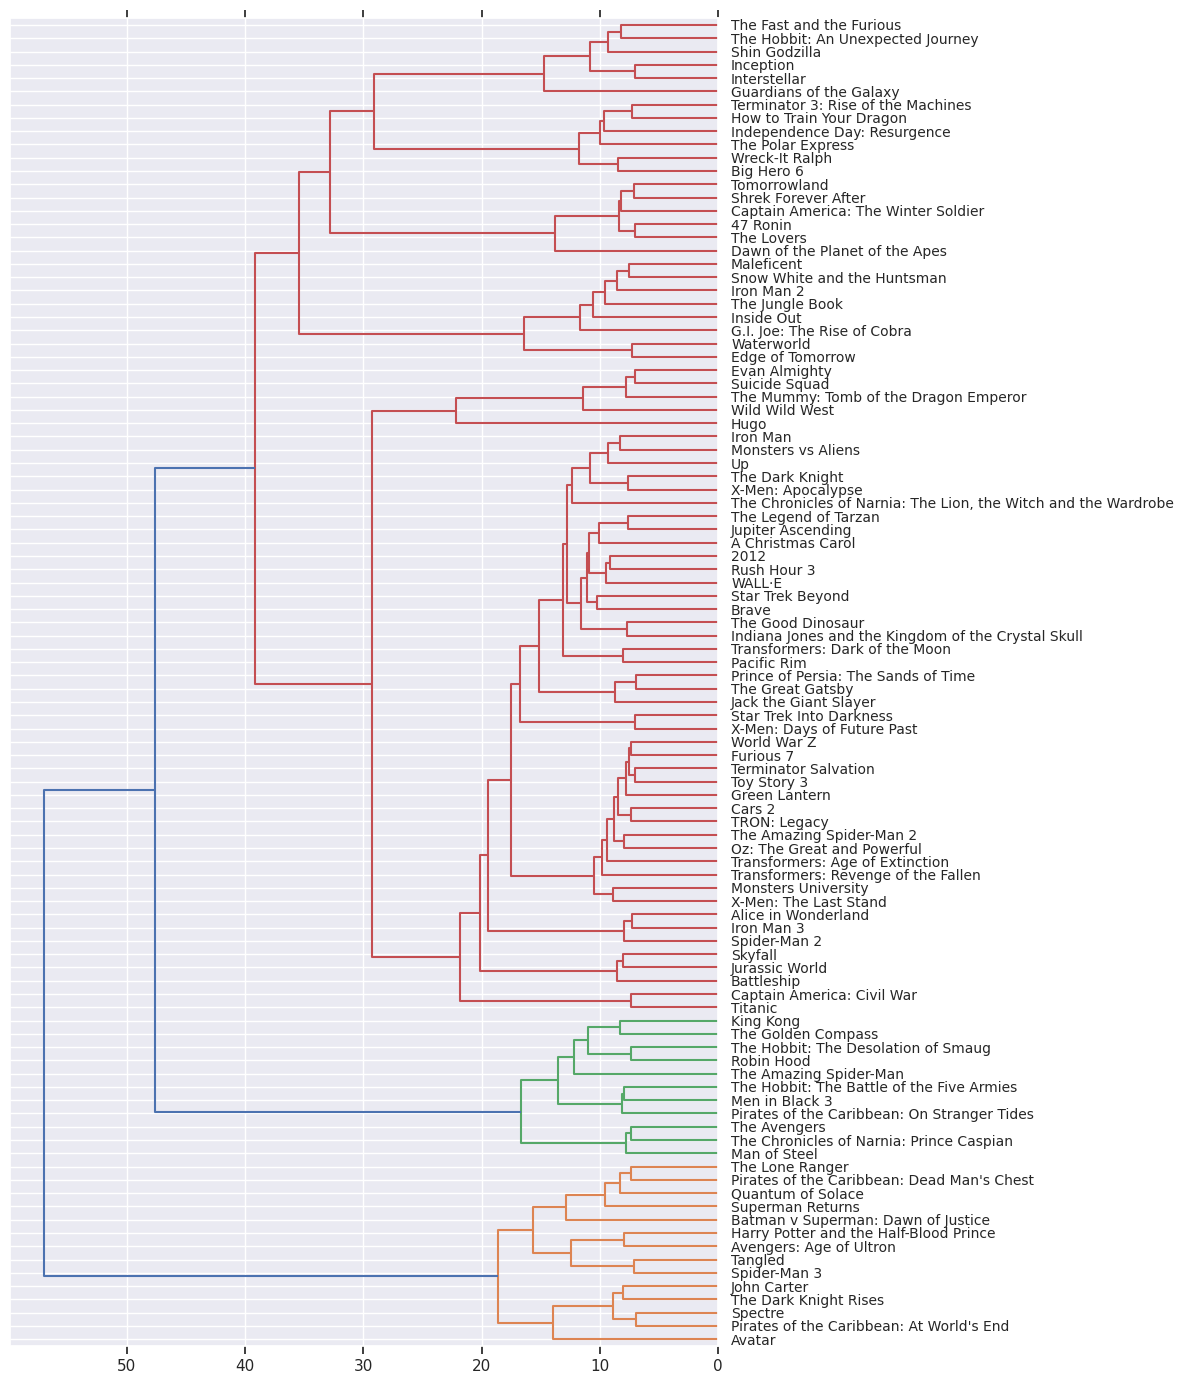

In [24]:
plot_hierarchical_clusters(linkage_matrix,
                           p=100,
                           movie_data=df,
                           figure_size=(12, 14))